In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import re

plt.style.use('default')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

print("✅ Librerías importadas exitosamente!")

✅ Librerías importadas exitosamente!


In [17]:
df_original = pd.read_csv(r'Generacio_n_estimada_de_residuos_peligrosos_por_tipo_de_residuo_2017-2023.csv',
encoding='latin1')

print("✅ Archivo CSV cargado exitosamente!")
print(df_original.info())
df_original.head()

✅ Archivo CSV cargado exitosamente!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Entidad Federaativa  6375 non-null   int64  
 1   Entidad federativa      6375 non-null   object 
 2   Municipio               6375 non-null   object 
 3   Año                     6375 non-null   int64  
 4   Subsector               6335 non-null   object 
 5   Categoría de generador  6375 non-null   object 
 6   Categoría del residuo   6366 non-null   object 
 7   Tipo de residuo         6345 non-null   object 
 8   Generación estimada     6375 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 448.4+ KB
None


,ID Entidad Federaativa,Entidad federativa,Municipio,Año,Subsector,Categoría de generador,Categoría del residuo,Tipo de residuo,Generación estimada
0,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,"Gasolina, diesel y naftas gastados o sucios pr...",Pequeño Generador,1.22
1,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,"Gasolina, diesel y naftas gastados o sucios pr...","Mezclas de combustibles sucios, mezclas de hid...",0.04
2,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Liquidos de proceso,"Agua contaminada con hidrocarburos, combustibl...",0.09
3,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Lodos aceitosos,"Con contaminacion de hidrocarburos, combustibl...",1.08
4,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Residuos solidos,"Estopa, trapo, plasticos, carton, madera, broc...",3.12


# Plan de Ejecución del Proceso ETL

Este documento detalla el plan de trabajo para el diseño e implementación de un proceso ETL (Extracción, Transformación, Carga) básico utilizando Python (principalmente Pandas) sobre nuestro conjunto de datos seleccionado de datos.gob.mx.

---

## 1. Integrantes del Equipo

* Ayala Garcia Jonathan David
* Acosta Guerra Andres Isai
* Castañeda Rodriguez Jaime
* Hernandez Ramirez Adrian



## 2. Dataset Seleccionado

* **Nombre del Dataset:** Residuos Peligrosos Generados por Entidad Federativa y Municipio
* **Enlace al Dataset en datos.gob.mx:**
[https://historico.datos.gob.mx/busca/dataset/generacion-estimada-de-residuos-peligrosos-por-tipo-de-residuo]

## 3. Objetivo de Análisis Principal

Nuestros análisis principales con este dataset para el proyecto integrador incluyen:

* Detectar y cuantificar registros duplicados y posibles inconsistencias en los datos de residuos peligrosos, para asegurar la calidad y unicidad de la información.
* Identificar y analizar valores faltantes en las variables clave, con el fin de evaluar la completitud del dataset y definir estrategias de imputación o limpieza.
* Detectar valores atípicos en las variables numéricas relevantes (por ejemplo, "Generación estimada"), para identificar posibles errores de captura o casos excepcionales que requieran revisión.

Estas decisiones guiarán las transformaciones necesarias para

## 4. Diseño Detallado del Proceso ETL

### 4.1. Plan de Extracción (E)

* **Archivo a Leer:** residuos_peligrosos.csv
* **Formato del Archivo:** CSV
* **Parámetros de Lectura (ej. para CSV):**
    * **Separador:** `,`
    * **Encoding:** `utf-8`
    * **Encabezados:** Sí
* **Selección Inicial de Columnas:**
    * Se cargarán todas las columnas y se realizará la selección en la fase de Transformación.

In [18]:
faltantes = df_original.isnull().sum()
print(f" \n Columnas con valores faltantes: \n{faltantes}")

porcentaje_faltantes = (faltantes / len(df_original)) * 100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(f" \n Porcentaje de valores faltantes por columna: \n{porcentaje_faltantes}")

columnas_mas_20 = porcentaje_faltantes[porcentaje_faltantes > 20]
print("\nColumnas con más del 20% de valores faltantes:")
print(columnas_mas_20.shape[0])

 
 Columnas con valores faltantes: 
ID Entidad Federaativa     0
Entidad federativa         0
Municipio                  0
Año                        0
Subsector                 40
Categoría de generador     0
Categoría del residuo      9
Tipo de residuo           30
Generación estimada        0
dtype: int64
 
 Porcentaje de valores faltantes por columna: 
ID Entidad Federaativa    0.000000
Entidad federativa        0.000000
Municipio                 0.000000
Año                       0.000000
Subsector                 0.627451
Categoría de generador    0.000000
Categoría del residuo     0.141176
Tipo de residuo           0.470588
Generación estimada       0.000000
dtype: float64

Columnas con más del 20% de valores faltantes:
0


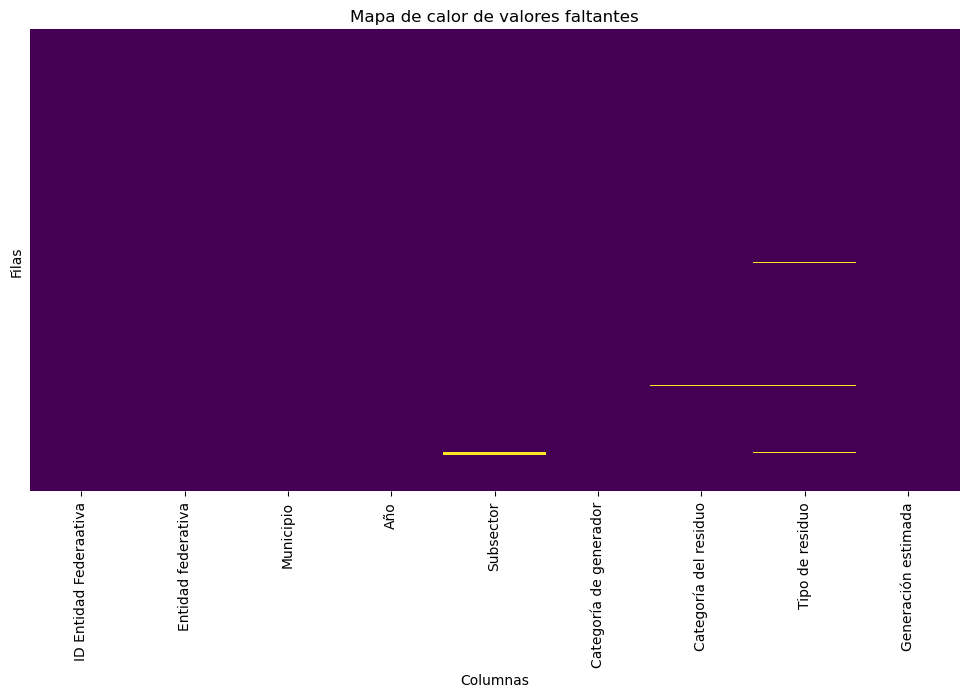

In [19]:

plt.figure(figsize=(12, 6))
sns.heatmap(df_original.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de calor de valores faltantes')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

In [30]:

duplicados_exactos = df_original.duplicated().sum()
print(f"\nNúmero de registros duplicados exactos: {duplicados_exactos}")

# Identificar posibles duplicados con variaciones
posibles_variaciones = df_original.duplicated(subset=['Subsector', 'Tipo de residuo','Generación estimada'], keep=False)

print(f"\nNúmero de registros duplicados con posibles variaciones: {posibles_variaciones.sum()}")

# Mostrar columnas con valores faltantes
print("\nColumnas con valores faltantes:")
print(df_original.isnull().sum())



Número de registros duplicados exactos: 66

Número de registros duplicados con posibles variaciones: 3510

Columnas con valores faltantes:
ID Entidad Federaativa     0
Entidad federativa         0
Municipio                  0
Año                        0
Subsector                 40
Categoría de generador     0
Categoría del residuo      9
Tipo de residuo           30
Generación estimada        0
dtype: int64



Valores atípicos encontrados:

Columna: Generación estimada
0 valores atípicos encontrados.


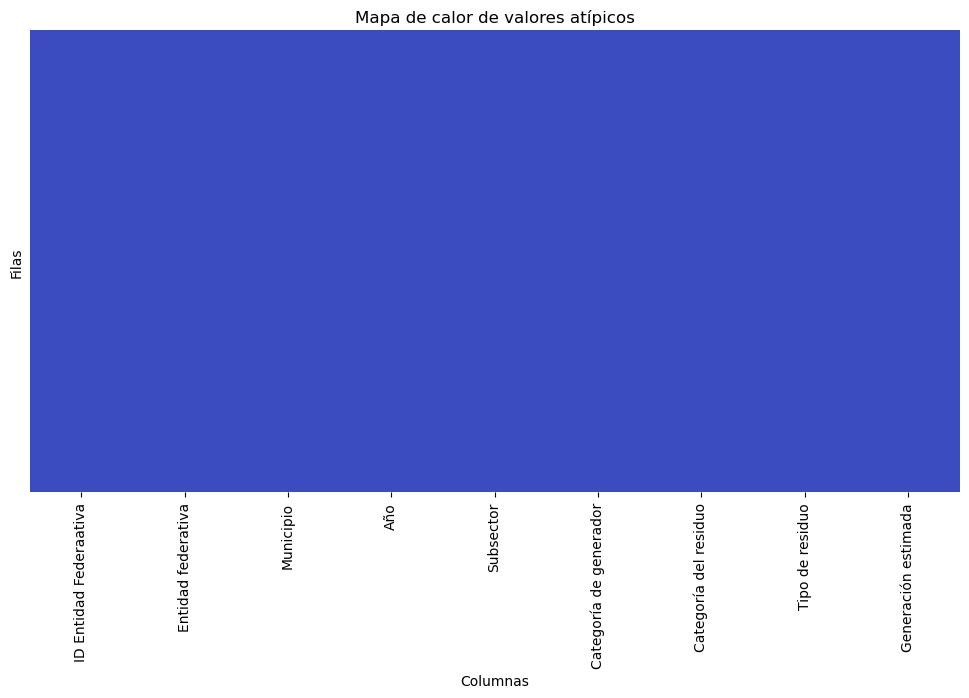

In [21]:

rangos_validos = {
    'Generación estimada': (0, 1000000),
}

# Encontrar valores atipicos
valores_atipicos = {}
for columna, (min_val, max_val) in rangos_validos.items():
    if columna in df_original.columns:
        # Encontrar valores atípicos y colocarlos en un DataFrame
        atipicos = df_original[(df_original[columna] < min_val) | (df_original[columna] > max_val)]
        valores_atipicos[columna] = atipicos
if valores_atipicos:
    print("\nValores atípicos encontrados:")
    for columna, atipicos in valores_atipicos.items():
        print(f"\nColumna: {columna}")
        print(atipicos.shape[0], "valores atípicos encontrados.")

# Mostrar un mapa de calor de valores atípicos
plt.figure(figsize=(12, 6))
sns.heatmap(df_original.isin(valores_atipicos).astype(int), cbar=False, cmap='coolwarm', yticklabels=False)
plt.title('Mapa de calor de valores atípicos')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()



### 4.2. Plan de Transformación (T)

Esta es la fase más crítica. Aquí detallamos las acciones que se tomarán para limpiar y estructurar los datos, columna por columna si es necesario, basándonos en nuestra exploración previa y los objetivos de análisis.

* **4.2.1. Renombrar/Estandarizar Columnas:**
    * **Lista de Columnas a Renombrar:**
        * `ID Entidad Federaativa` -> `ID_Entidad_Federativa` (Justificación: Corregir error ortográfico y estandarizar a snake_case)
        * `Entidad federativa` -> `Entidad_Federativa` (Justificación: Estandarizar a snake_case)
        * `Generación estimada` -> `Generacion_Estimada` (Justificación: Estandarizar a snake_case y eliminar acentos)
    * **Estandarizar cadenas
        * Acentos
        * Mayusculas
        * Minusculas
        * Espacios
        * Caracteres especiales

In [ ]:
# Crear una copia del DataFrame original para evitar modificarlo directamente
df_copy = df_original.copy()

{6375}


In [ ]:


# Diccionario de renombrado
renombrar_columnas = {
    'ID Entidad Federaativa': 'ID_Entidad_Federativa',
    'Entidad federativa': 'Entidad_Federativa',
    'Categoría de generador': 'Categoria_Generador',
    'Categoría del residuo': 'Categoria_Residuo',
    'Tipo de residuo': 'Tipo_Residuo',
    'Generación estimada': 'Generacion_Estimada'
}

print("Columnas antes del renombrado:")
print(df_original.columns.tolist())

df_copy = df_copy.rename(columns=renombrar_columnas)

print("Columnas después del renombrado:")
print(df_copy.columns.tolist())


Columnas antes del renombrado:
['ID Entidad Federaativa', 'Entidad federativa', 'Municipio', 'Año', 'Subsector', 'Categoría de generador', 'Categoría del residuo', 'Tipo de residuo', 'Generación estimada']
Columnas después del renombrado:
['ID_Entidad_Federativa', 'Entidad_Federativa', 'Municipio', 'Año', 'Subsector', 'Categoria_Generador', 'Categoria_Residuo', 'Tipo_Residuo', 'Generacion_Estimada']
6375


* **4.2.2. Selección de Columnas (Eliminación de No Necesarias):**
    * **Columnas Finales Necesarias:**
        * `ID_Entidad_Federativa` (Identificador único de la entidad federativa)
        * `Entidad_Federativa` (Nombre de la entidad federativa)
        * `Municipio` (Nombre del municipio)
        * `Año` (Año de registro)
        * `Subsector` (Clasificación del subsector)
        * `Categoria_de_Generador` (Categoría del generador de residuos)
        * `Categoria_del_Residuo` (Tipo de residuo)
        * `Tipo_de_Residuo` (Clasificación específica del residuo)
        * `Generacion_Estimada` (Cantidad estimada de residuos generados)
        > Estas columnas son importantes porque contienen la información clave para el análisis geográfico, temporal y cuantitativo de los residuos peligrosos.

* **4.2.3. Corrección de Tipos de Datos:**
    * **Columna `Año`:** Convertir a tipo `int`. (Justificación: El archivo original solo contiene el año.)
    * **Columna `Generacion_Estimada`:** Convertir a tipo `float`. (Justificación: Para realizar cálculos y análisis estadísticos sobre la cantidad de residuos.)
    * **Columna `Entidad_Federativa`, `Municipio`, `Subsector`, `Categoria_de_Generador`, `Categoria_del_Residuo`:** Convertir a tipo `category`. (Justificación: Son variables categóricas y esto optimiza memoria y análisis.)
    * *Consideraciones:* Usar `errors='coerce'` para manejar valores no convertibles.

In [34]:
#Tipos de datos antes de la conversión
print("Tipos de datos antes de la conversión:")
print(df_copy.dtypes)
# Corrección de tipos de datos
df_copy['Año'] = pd.to_numeric(df_copy['Año'], errors='coerce').astype('Int64')
df_copy['Generacion_Estimada'] = pd.to_numeric(df_copy['Generacion_Estimada'], errors='coerce')

categoricas = [ 
    'Entidad_Federativa',
    'Municipio',
    'Subsector',
    'Categoria_Generador',
    'Categoria_Residuo',
]

for col in categoricas:
    df_copy[col] = df_copy[col].astype('category')

print("Tipos de datos después de la conversión:")
print(df_copy.dtypes)


Tipos de datos antes de la conversión:
ID_Entidad_Federativa       int64
Entidad_Federativa       category
Municipio                category
Año                         Int64
Subsector                category
Categoria_Generador      category
Categoria_Residuo        category
Tipo_Residuo               object
Generacion_Estimada       float64
dtype: object
Tipos de datos después de la conversión:
ID_Entidad_Federativa       int64
Entidad_Federativa       category
Municipio                category
Año                         Int64
Subsector                category
Categoria_Generador      category
Categoria_Residuo        category
Tipo_Residuo               object
Generacion_Estimada       float64
dtype: object


* **4.2.4. Limpieza de Texto (para columnas categóricas/texto):**
    * **Columna `Entidad_Federativa`:**
        * Acciones: Eliminar espacios extra (`.str.strip()`), convertir a mayúsculas (`.str.upper()`), estandarizar nombres de entidades si es necesario (ej. "CDMX" a "CIUDAD DE MÉXICO").
        * (Justificación: Mejorar consistencia y permitir agrupaciones correctas.)
    * **Columna `Municipio`:**
        * Acciones: Eliminar espacios extra, convertir a mayúsculas, corregir errores ortográficos comunes.
        * (Justificación: Evitar duplicados por diferencias de formato y facilitar análisis geográfico.)
    * **Columna `Subsector`, `Categoría de generador`, `Categoría del residuo`, `Tipo de residuo`:**
        * Acciones: Eliminar espacios extra, convertir a mayúsculas, estandarizar valores si es necesario.
        * (Justificación: Mejorar calidad de los datos categóricos y facilitar análisis.)

In [36]:
# Estandarizar cadenas de texto teniendo en cuenta espacios, mayúsculas, mínusculas y caracteres especiales 
def estandarizar_texto(texto):
    if isinstance(texto, str):
        texto = texto.translate(str.maketrans("áéíóúÁÉÍÓÚ", "aeiouAEIOU"))  # quitar acentos
        texto = texto.lower()
        texto = re.sub(r'[^a-z0-9\s]', '', texto)  # quitar símbolos
        texto = ' '.join(texto.strip().split())  # limpiar espacios
        return texto.title()
    return texto

# Aplicar la función de estandarización a las columnas de texto
columnas_texto = ['Entidad_Federativa','Municipio','Subsector', 'Categoria_Generador', 'Categoria_Residuo', 'Tipo_Residuo']
for columna in columnas_texto:
    print("Normalizando datos en: ", columna)
    df_copy[columna] = df_copy[columna].apply(estandarizar_texto)

print("Valores únicos de Entidad_Federativa después de limpieza:")
print(df_copy['Entidad_Federativa'].unique())


Normalizando datos en:  Entidad_Federativa
Normalizando datos en:  Municipio
Normalizando datos en:  Subsector
Normalizando datos en:  Categoria_Generador
Normalizando datos en:  Categoria_Residuo
Normalizando datos en:  Tipo_Residuo
Valores únicos de Entidad_Federativa después de limpieza:
['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila De Zaragoza' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad De Mexico'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'Mexico'
 'Michoacan De Ocampo' 'Morelos' 'Nayarit' 'Nuevo Leon' 'Oaxaca' 'Puebla'
 'Queretaro' 'Quintana Roo' 'San Luis Potosi' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz De Ignacio De La Llave' 'Yucatan'
 'Zacatecas']


* **4.2.5. Manejo de Valores Faltantes (NaNs):**
    * **Columna `Subsector`:**
        * Estrategia: Rellenar valores faltantes con 'DESCONOCIDO'.
        * Justificación: Es una variable categórica y no se puede imputar numéricamente; asignar 'DESCONOCIDO' permite conservar los registros para el análisis.
    * **Columna `Categoría del residuo`:**
        * Estrategia: Rellenar valores faltantes con 'NO ESPECIFICADO'.
        * Justificación: Mantener la integridad del dataset y evitar la eliminación de registros potencialmente útiles.
    * **Columna `Tipo de residuo`:**
        * Estrategia: Rellenar valores faltantes con 'NO ESPECIFICADO'.
        * Justificación: Similar a la anterior, para no perder información relevante y facilitar el análisis.

In [38]:
# Manejo de valores faltantes
df_copy['Subsector'] = df_copy['Subsector'].fillna('DESCONOCIDO')
df_copy['Categoria_Residuo'] = df_copy['Categoria_Residuo'].fillna('NO ESPECIFICADO')
df_copy['Tipo_Residuo'] = df_copy['Tipo_Residuo'].fillna('NO ESPECIFICADO')

print("Valores faltantes por columna después del tratamiento:")
print(df_copy.isnull().sum())


Valores faltantes por columna después del tratamiento:
ID_Entidad_Federativa    0
Entidad_Federativa       0
Municipio                0
Año                      0
Subsector                0
Categoria_Generador      0
Categoria_Residuo        0
Tipo_Residuo             0
Generacion_Estimada      0
dtype: int64


* **4.2.6. Manejo de Duplicados:**
    * **Identificación:** Se buscarán filas duplicadas completas para su eliminacion directa ya que representa el 1% de los datos totales.
    * **Tratamiento:** Se eliminarán los duplicados conservando la primera ocurrencia usando `.drop_duplicates()`.
    * Justificación: Asegurar la unicidad de los registros clave y evitar el sesgo en los análisis por registros repetidos.

In [42]:
# Eliminar duplicados completos

suma_duplicados = df_copy.duplicated().sum()
print("Porcentaje de duplicados exactos")
porcentaje_duplicados = (suma_duplicados / len(df_original)) * 100
print(f"{porcentaje_duplicados:.2f}%")

df_copy = df_copy.drop_duplicates()
print(f"Total de registros después de eliminar duplicados: {len(df_original)}")
print(f"Total de registros después de eliminar duplicados: {len(df_copy)}")
print(f"Duplicados eliminados: {len(df_original)-len(df_copy)}")



Porcentaje de duplicados exactos
1.04%
Total de registros después de eliminar duplicados: 6375
Total de registros después de eliminar duplicados: 6309
Duplicados eliminados: 66


* **4.2.7. Validación/Corrección de Errores (Valores Atípicos/Imposibles):**
    * **Columna `Generacion_Estimada`:**
        * Rango Lógico: Entre 0 y 1,000,000.
        * Acción: Reemplazar valores fuera de rango por NaN y luego decidir si imputar o eliminar esos registros.
        * Justificación: Evitar sesgos en los análisis estadísticos y asegurar que los resultados reflejen datos plausibles.

In [ ]:
# Validación/corrección de valores atípicos en 'Generacion_Estimada'
min_val, max_val = 0, 1000000  # Ajusta el rango según el contexto real
fuera_de_rango = (df_copy['Generacion_Estimada'] < min_val) | (df_copy['Generacion_Estimada'] > max_val)
df_copy.loc[fuera_de_rango, 'Generacion_Estimada'] = np.nan

print("Cantidad de valores fuera de rango en 'Generacion_Estimada' corregidos a NaN:", fuera_de_rango.sum())
#No hay valores atipicos


Cantidad de valores fuera de rango en 'Generacion_Estimada' corregidos a NaN: 0


* **4.2.8. (Opcional) Feature Engineering Básico:**
    * **Lo justifican pibes

* **4.2.9. Estructura Final del DataFrame(s):**
    * Descripción: El DataFrame final contendrá únicamente las columnas relevantes y limpias para el análisis de residuos peligrosos. Todas las columnas estarán estandarizadas, sin valores faltantes críticos, y con tipos de datos apropiados. Se mantendrá un solo DataFrame principal, ya que el análisis no requiere una estructura de tablas separadas (hechos/dimensiones).
    * Ejemplo de la estructura esperada:
        ```
        DataFrame Final:
        - ID_Entidad_Federativa (int): Identificador único de la entidad federativa
        - Entidad_Federativa (category): Nombre estandarizado de la entidad federativa
        - Municipio (category): Nombre estandarizado del municipio
        - Año (int): Año del registro
        - Subsector (category): Clasificación del subsector
        - Categoría de generador (category): Tipo de generador de residuos
        - Categoría del residuo (category): Tipo general de residuo
        - Tipo de residuo (category): Clasificación específica del residuo
        - Generacion_Estimada (float): Cantidad estimada de residuos generados

In [46]:

print("Estructura final del DataFrame:")
print(df_copy.dtypes)
print("\nPrimeras filas del DataFrame final:")
df_copy.head()



Estructura final del DataFrame:
ID_Entidad_Federativa       int64
Entidad_Federativa         object
Municipio                category
Año                         Int64
Subsector                  object
Categoria_Generador        object
Categoria_Residuo          object
Tipo_Residuo               object
Generacion_Estimada       float64
dtype: object

Primeras filas del DataFrame final:


,ID_Entidad_Federativa,Entidad_Federativa,Municipio,Año,Subsector,Categoria_Generador,Categoria_Residuo,Tipo_Residuo,Generacion_Estimada
0,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Gasolina Diesel Y Naftas Gastados O Sucios Pro...,Pequeo Generador,1.22
1,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Gasolina Diesel Y Naftas Gastados O Sucios Pro...,Mezclas De Combustibles Sucios Mezclas De Hidr...,0.04
2,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Liquidos De Proceso,Agua Contaminada Con Hidrocarburos Combustible...,0.09
3,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Lodos Aceitosos,Con Contaminacion De Hidrocarburos Combustible...,1.08
4,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Residuos Solidos,Estopa Trapo Plasticos Carton Madera Brochas P...,3.12


### 4.3. Plan de Carga (L)

* **Destino Simulado:** [Seleccionar una opción y justificar.]
    * **Opción 1 (Recomendada): Base de Datos SQLite**
        * Nombre del archivo de la DB: `[nombre_de_su_base_de_datos.db]`
        * Nombre de la tabla: `[nombre_de_su_tabla]`
        * Parámetros `to_sql`: `if_exists='replace'`, `index=False` (para no guardar el índice de Pandas como columna).
        * Justificación: [Ej. "Simula una carga a una base de datos relacional para futuros análisis SQL."]
    * **Opción 2: Archivos Limpios (CSV o JSON)**
        * Nombre del archivo CSV: `[nombre_dataset_limpio.csv]`
        * Nombre del archivo JSON: `[nombre_dataset_limpio.json]`
        * Parámetros `to_csv`/`to_json`: `index=False` (para no guardar el índice de Pandas como columna).
        * Justificación: [Ej. "Fácilmente accesible para herramientas de análisis posteriores."]
